Welcome to our World Cup Prediction Model for the 2022 Edition of the FIFA World Cup, Qatar. 

Let's begin by importing all the required modules for the prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Now, we'll import results.csv which contains all the results of international football matches from 1872 to 2022, and view the head.

In [2]:
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


Now, let's append a column 'goal_difference' and establish who the winner is. Now again we'll take a look at the head of the dataframe.

In [3]:
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


Now we’ll work with a subset of the data, one that includes games played only by Argentina. This will help us focus on what features are interesting for one country and later expand to countries participating in the world cup.

In [4]:
df = results[(results['home_team'] == 'Argentina') | (results['away_team'] == 'Argentina')]
argentina = df.iloc[:]
argentina.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
145,1902-07-20,Uruguay,Argentina,0.0,6.0,Friendly,Montevideo,Uruguay,False,Argentina,6.0
155,1903-09-13,Argentina,Uruguay,2.0,3.0,Friendly,Buenos Aires,Argentina,False,Uruguay,1.0
177,1905-08-15,Argentina,Uruguay,0.0,0.0,Copa Lipton,Buenos Aires,Argentina,False,Draw,0.0
188,1906-08-15,Uruguay,Argentina,0.0,2.0,Copa Lipton,Montevideo,Uruguay,False,Argentina,2.0
190,1906-10-21,Argentina,Uruguay,2.0,1.0,Copa Newton,Buenos Aires,Argentina,False,Argentina,1.0


The first World Cup was played in 1930. Create a column for year and pick all the games played after 1930.

In [5]:
year = []
for row in argentina['date']:
    year.append(int(row[:4]))
argentina ['match_year']= year
argentina_1930 = argentina[argentina.match_year >= 1930]
argentina_1930.count()

date               652
home_team          652
away_team          652
home_score         652
away_score         652
tournament         652
city               652
country            652
neutral            652
winning_team       652
goal_difference    652
match_year         652
dtype: int64

We can now visualize the most common match outcome for Argentina throughout the years.

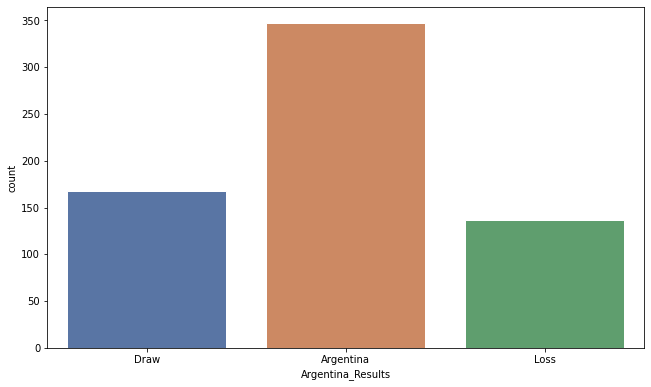

In [6]:
wins = []
for row in argentina_1930['winning_team']:
    if row != 'Argentina' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Argentina_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Argentina_Results', data=winsdf)

Now, let's create a dataframe with all the participating teams.

We then further filter the results dataframe to show only teams in this years world cup from 1930 onwards as well as drop duplicates.

In [7]:
worldcup_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 
                  'IR Iran', 'USA', 'Wales',  'Argentina', 'Saudi Arabia',
                  'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 
                  'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 
                  'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia',
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay',
                  'South Korea']
                  
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               15268
home_team          15268
away_team          15268
home_score         15268
away_score         15268
tournament         15268
city               15268
country            15268
neutral            15268
winning_team       15268
goal_difference    15268
dtype: int64

Now, we'll view the head of the dataframe


In [8]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


Create a year column and drop games before 1930 as well as columns that won’t affect match outcome for example date, home_score, away_score, tournament, city, country, goal_difference and match_year

In [9]:
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1264,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1270,1930-02-23,Portugal,France,2.0,0.0,Friendly,Porto,Portugal,False,Portugal,2.0,1930
1271,1930-03-02,Germany,Italy,0.0,2.0,Friendly,Frankfurt am Main,Germany,False,Italy,2.0,1930
1273,1930-03-23,France,Switzerland,3.0,3.0,Friendly,Colombes,France,False,Draw,0.0,1930


Now let's get to dropping columns which will not affect matchoutcomes and view the head of the data.

In [10]:
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
7,Wales,Scotland,False,Scotland
10,England,Wales,False,England


Modify the “Y” (prediction label) in order to simplify our model’s processing.

The winning_team column will show “2” if the home team has won, “1” if it was a tie, and “0” if the away team has won.

In [11]:
#The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,Wales,Scotland,False,0
4,England,Wales,False,2


Convert home_team and away _team from categorical variables to continuous inputs, by setting dummy variables.

Using pandas, get_dummies() function. It replaces categorical columns with their one-hot (numbers ‘1’ and ‘0’) representations enabling them to be loaded into Scikit-learn model.

We then separate the X and Y set and split the data into 75 percent training and 25 percent test.

In [12]:
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let’s have a look at our final dataframe:



In [13]:
final.head()

,neutral,winning_team,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We will use logistic regression, a classifier algorithm. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. Specifically the cumulative logistic distribution.

In other words logistic regression attempts to predict an outcome (a win or a loss) given a set of data points (stats) that likely influence that outcome.

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training set accuracy:  0.578
Test set accuracy:  0.558


We will start by loading the FIFA ranking dataset and a dataset containing the fixture of the group stages of the tournament obtained from here. The team which is positioned higher on the FIFA Ranking will be considered “favourite” for the match and therefore, will be positioned under the “home_teams” column since there are no “home” or “away” teams in World Cup games. We then add teams to the new prediction dataset based on ranking position of each team. The next step will be to create dummy variables and and deploy the machine learning model.

In [15]:
ranking = pd.read_csv('ranking.csv') 
fixtures = pd.read_csv('fixtures.csv')
rankings = ranking.drop_duplicates(subset='country_full',)

pred_set = []

In [16]:
#fixtures.insert(1, 'first_position', fixtures['Home Team'].map(rankings.set_index('country_full',verify_integrity= True)['rank']))
#fixtures.insert(2, 'second_position', fixtures['Away Team'].map(rankings.set_index('country_full')['rank']))


fixtures = fixtures.iloc[:48, :]

fixtures.tail()

,Unnamed: 0,Match Number,first_position,second_position,Round Number,Date,Location,Home Team,Away Team,Group,Result
43,43,44,31.0,11.0,3,01/12/2022 19:00,Al Bayt Stadium,Costa Rica,Germany,Group E,NaN
44,44,45,61.0,14.0,3,02/12/2022 15:00,Al Janoub Stadium,Ghana,Uruguay,Group H,NaN
45,45,46,28.0,9.0,3,02/12/2022 15:00,Education City Stadium,Korea Republic,Portugal,Group H,NaN
46,46,47,21.0,15.0,3,02/12/2022 19:00,Stadium 974,Serbia,Switzerland,Group G,NaN
47,47,48,43.0,1.0,3,02/12/2022 19:00,Lusail Stadium,Cameroon,Brazil,Group G,NaN


Loop to add teams to new prediction dataset based on the ranking position of each team

In [17]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,England,Iran,None
2,Netherlands,Senegal,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None


In [18]:
backup_pred_set.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,England,Iran,None
2,Netherlands,Senegal,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None


In [19]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


,neutral,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here are the results of group stages. We'll append the results to a new dataframe groupstage so that we can visiaulize the data later.

In [20]:
groupstage = pd.DataFrame(columns=['team1','team2', 'winner', 'pred1', 'preddraw', 'pred2'])

winner = []
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    groupstage.at[i, 'team1'] = backup_pred_set.iloc[i, 0]
    groupstage.at[i, 'team2'] = backup_pred_set.iloc[i, 1]
    print(backup_pred_set.iloc[i, 0] + " and " + backup_pred_set.iloc[i, 1])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
        groupstage.at[i, 'winner'] = backup_pred_set.iloc[i, 0]
        winner.append(backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        groupstage.at[i, 'winner'] = backup_pred_set.iloc[i, 1]
        winner.append(backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    groupstage.at[i, 'pred1'] = logreg.predict_proba(pred_set)[i][2]
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    groupstage.at[i, 'preddraw'] = logreg.predict_proba(pred_set)[i][1]
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    groupstage.at[i, 'pred2'] = logreg.predict_proba(pred_set)[i][0]
    print("")

print(groupstage)
groupstage.to_csv('groupstagewinners.csv')

Ecuador and Qatar
Winner: Ecuador
Probability of Ecuador winning:  0.591
Probability of Draw:  0.251
Probability of Qatar winning:  0.158

England and Iran
Winner: England
Probability of England winning:  0.713
Probability of Draw:  0.215
Probability of Iran winning:  0.072

Netherlands and Senegal
Winner: Netherlands
Probability of Netherlands winning:  0.692
Probability of Draw:  0.219
Probability of Senegal winning:  0.089

USA and Wales
Winner: USA
Probability of USA winning:  0.390
Probability of Draw:  0.232
Probability of Wales winning:  0.378

Argentina and Saudi Arabia
Winner: Argentina
Probability of Argentina winning:  0.811
Probability of Draw:  0.154
Probability of Saudi Arabia winning:  0.035

Denmark and Tunisia
Winner: Denmark
Probability of Denmark winning:  0.697
Probability of Draw:  0.205
Probability of Tunisia winning:  0.098

Mexico and Poland
Winner: Mexico
Probability of Mexico winning:  0.510
Probability of Draw:  0.288
Probability of Poland winning:  0.202

Fr

Now, let's count the number of wins of each team, so that we can create a table at the end to figure out winners and runners up of each group.

In [21]:
def countOccurrence(a):
  k = {}
  for j in a:
    if j in k:
      k[j] +=1
    else:
      k[j] =1
  return k

print(countOccurrence(winner))

{'Ecuador': 1, 'England': 3, 'Netherlands': 3, 'USA': 2, 'Argentina': 3, 'Denmark': 2, 'Mexico': 2, 'France': 3, 'Croatia': 2, 'Germany': 2, 'Spain': 3, 'Belgium': 3, 'Switzerland': 2, 'Uruguay': 2, 'Portugal': 3, 'Brazil': 3, 'Wales': 1, 'Senegal': 2, 'Tunisia': 1, 'Poland': 1, 'Japan': 1, 'Serbia': 1, 'Korea Republic': 1, 'Morocco': 1}


Round of 16 Predictions with above predicted teams:

In [22]:
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('England', 'Senegal'),
            ('France', 'Mexico'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

Function for prediction

In [34]:
def clean_and_predict(matches, ranking, final, logreg):

    positions = []

    for match in matches:
        try:
          positions.append(rankings.loc[rankings['country_full'] == match[0],'rank'].iloc[0])
          positions.append(rankings.loc[rankings['country_full'] == match[1],'rank'].iloc[0])
        except:
          print(match)
          pass
    
    pred_set = []

    i = 0
    j = 0

    while i < (len(positions)):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        
        pred_set.append(dict1)
        i += 2
        j += 1

    
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['winning_team'], axis=1)

    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):

        print(backup_pred_set.iloc[i,0] + " and " + backup_pred_set.iloc[i, 1])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")



Now, let's run the clean_and_predict function for the teams selected for group of 16.

In [35]:
clean_and_predict(group_16, ranking, final, logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Netherlands and Wales
Winner: Netherlands
Probability of Netherlands winning:  0.641
Probability of Draw:  0.220
Probability of Wales winning:  0.139

Argentina and Denmark
Winner: Argentina
Probability of Argentina winning:  0.749
Probability of Draw:  0.149
Probability of Denmark winning:  0.102

England and Senegal
Winner: England
Probability of England winning:  0.774
Probability of Draw:  0.168
Probability of Senegal winning:  0.058

France and Mexico
Winner: France
Probability of France winning:  0.600
Probability of Draw:  0.227
Probability of Mexico winning:  0.173

Spain and Croatia
Winner: Spain
Probability of Spain winning:  0.606
Probability of Draw:  0.255
Probability of Croatia winning:  0.139

Brazil and Uruguay
Winner: Brazil
Probability of Brazil winning:  0.728
Probability of Draw:  0.167
Probability of Uruguay winning:  0.105

Belgium and Germany
Winner: Germany
Probability of Belgium winning:  0.311
Probability of Draw:  0.186
Probability of Germany winning:  0.503


From the above set, we can select the winners, and based on data provided by EA, we can say who faces off who in the Quarters. Now, let's create a new dataframe for teams who have moved on to the quarters.

In [30]:
quarters = [('Netherlands', 'Argentina'),
            ('Spain', 'Brazil'),
            ('England', 'France'),
            ('Germany', 'Portugal'),
            ]

Now, run the clean_and_predict function for the teams selected for Quarter Finals.

In [36]:
clean_and_predict(quarters, ranking, final, logreg)

Argentina and Netherlands
Winner: Argentina
Probability of Argentina winning:  0.614
Probability of Draw:  0.250
Probability of Netherlands winning:  0.136

Brazil and Spain
Winner: Brazil
Probability of Brazil winning:  0.588
Probability of Draw:  0.276
Probability of Spain winning:  0.136

France and England
Winner: England
Probability of France winning:  0.316
Probability of Draw:  0.261
Probability of England winning:  0.423

Portugal and Germany
Winner: Germany
Probability of Portugal winning:  0.338
Probability of Draw:  0.278
Probability of Germany winning:  0.384



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Now, let's create a new dataframe for teams who have moved on to the Semi Finals.

In [37]:
semis = [('Argentina','Brazil'),
         ('England','Portugal')]

Now, run the clean_and_predict function for the teams selected for Semi Finals.

In [38]:
clean_and_predict(semis, ranking, final, logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Brazil and Argentina
Winner: Brazil
Probability of Brazil winning:  0.611
Probability of Draw:  0.246
Probability of Argentina winning:  0.143

England and Portugal
Winner: England
Probability of England winning:  0.655
Probability of Draw:  0.209
Probability of Portugal winning:  0.136



Now, we have 2 teams facing off each other for the 3rd place spot. Let's create a dataframe for that.

In [39]:
third_place = [('Argentina', 'Portugal')]

Now, run the clean_and_predict function for the teams selected for the third placed team of FIFA World Cup 2022.

In [40]:
clean_and_predict(third_place, ranking, final, logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Argentina and Portugal
Winner: Argentina
Probability of Argentina winning:  0.711
Probability of Draw:  0.201
Probability of Portugal winning:  0.088



Now, we have 2 teams facing off each other in the Finals. Let's create a dataframe for that.

In [41]:
finals = [('Brazil','England')]

Now, run the clean_and_predict function for the teams selected for the Finals of FIFA World Cup 2022.

In [42]:
clean_and_predict(finals, ranking, final, logreg)

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.511
Probability of Draw:  0.275
Probability of England winning:  0.214



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


So, our model predicts BRAZIL to be the winners of the FIFA World Cup 2022 Qatar, and England as the Runners up. Argentina is predicted to be the 3rd placed team and Portugal end up in the 4th spot. 

With the World Cup coming up soon, within a week's time, be prepared to embrace your team's wins / losses. In the end, it's #thebeautifulgame. 

Even though the model predicted Brazil to win, I am still going to back Argentina to win this one. For Lionel Messi. Vamos Argentina😌.

Model - Inspired by LAUNAY CHRISTIAN
Developed by - Sai Pradyumnan Prem, Yaswanthraj SP